In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from scipy import stats
from scipy.stats import sem
from scipy.stats import pearsonr

### Examine Dataset

In [2]:
sal_data = pd.read_csv('salary.csv')
sal_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### Responders and missing values

In [3]:
sal_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

- Looking at the dataframe we see that we have missing value in the Salary column.

In [4]:
responders = sal_data.shape[0]
print("Responders in the Dataframe: ", responders)

Responders in the Dataframe:  514


- In this Dataframe we have 514 responders 

### Lowest & highest salary in the group

In [5]:
ls = np.min(sal_data['salary'])
print("Lowest salary: ", ls)

hs = np.max(sal_data['salary'])
print("Highest salary: ", hs)

Lowest salary:  29000.0
Highest salary:  96156.0


### Mean salary & standard error of the mean

In [6]:
x = sal_data['salary']
sal_data= sal_data.fillna(sal_data['salary'].mean())

In [7]:
m = np.mean(sal_data['salary'])
print("Average salary: ", m)

sem = (sal_data['salary']).sem()
print("Standard error: ", sem)

Average salary:  50863.22009783626
Standard error:  558.9715980665014


- The standard error indicates that the variation of the salary on average is +- 558.97 on the mean

### Standard deviation for the years worked

In [8]:
std = np.std(sal_data['yearsworked'])
print("Standard deviation: ", std)

Standard deviation:  9.435503224576884


- This standard deviation seems to be high indicating that the data points are spread further away from the mean. 
- This could be because of numerous outliers in the data set.

### Median salary

In [9]:
med = (sal_data['salary']).median()
print("Median: ", med)

Median:  50165.5


- The median is the mid point of the salary, indicating that half of the popullation of the salary is below the median and another half is above the median

### Interquatile range

The value of the interquartile range for salary in the sample is:  20306.25


Text(0.5, 1.0, 'Boxplot interpretation of Salary')

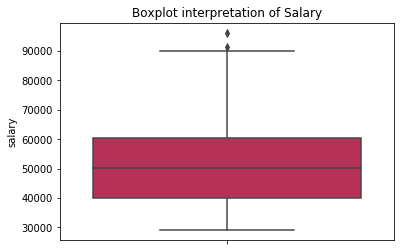

In [10]:
Q1 = sal_data['salary'].quantile(0.25)
Q3 = sal_data['salary'].quantile(0.75)

IQR = Q3 - Q1

print("The value of the interquartile range for salary in the sample is: ", IQR)
sns.boxplot(y="salary", data=sal_data, palette="rocket")
plt.title("Boxplot interpretation of Salary")

- It is safe to say that we have a positive skew and the data is more stretched out hence we tend to see more outliers, who earn a salary of 90 000 and more

### Total Men & Women in sample

  Gender  Total
0    men    386
1  women    128


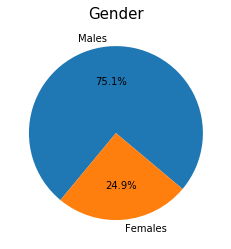

In [11]:
sal_data.rename(columns={'male': 'Gender'},inplace=True)
assign = {0:'women', 1:'men'}
sal_data['Gender'] = sal_data['Gender'].map(assign)

a=pd.DataFrame(sal_data.groupby('Gender').size()).reset_index()
b=a.rename(columns={0:"Total"})

print(b)


ratios = [.751, .249]
labels=['Males', 'Females']
plt.pie(ratios,explode=None, labels=labels, autopct='%1.1f%%', startangle=320)
plt.title('Gender', fontsize=15)
plt.show()

### Comparison between men & women Executives

In [12]:
ew = len(sal_data[(sal_data.Gender == 'women')&(sal_data.position == 3)])
print("Number of excutive women: ", ew)

em = len(sal_data[(sal_data.Gender == 'men')&(sal_data.position == 3)])
print("Number of excutive men: ", em)

Number of excutive women:  19
Number of excutive men:  192


### Histogram fo Salary

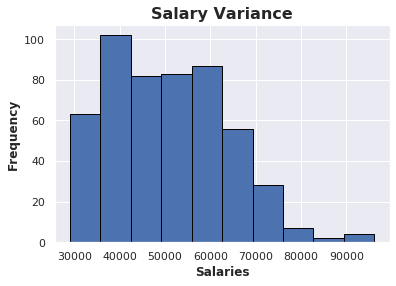

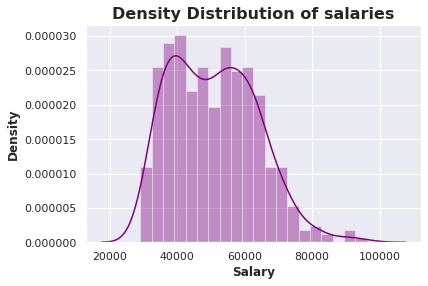

In [13]:
sns.set()
plt.hist(sal_data['salary'], edgecolor = 'black')
plt.title('Salary Variance', weight = 'bold', fontsize= 16)
plt.xlabel('Salaries', weight = 'bold')
plt.ylabel('Frequency', weight = 'bold')
plt.show()

sns.distplot(sal_data['salary'], hist=True,kde = True, bins= int(20), color = 'purple')
plt.xlabel('Salary', weight= 'bold')
plt.ylabel('Density', weight= 'bold')
plt.title('Density Distribution of salaries', weight = 'bold', fontsize= 16)
plt.subplots_adjust(wspace=0.7, hspace=0.3)
plt.show()

- According to the histogram above, we notice that the data is skewed to the right showing that the distribution of salary is between 40 000 and 60 000

- The density distribution is a variation of a histogram with its peaks showing that more people are getting salary of 40 000 , 45 000 and 60 000

### Average salaries of men and women.

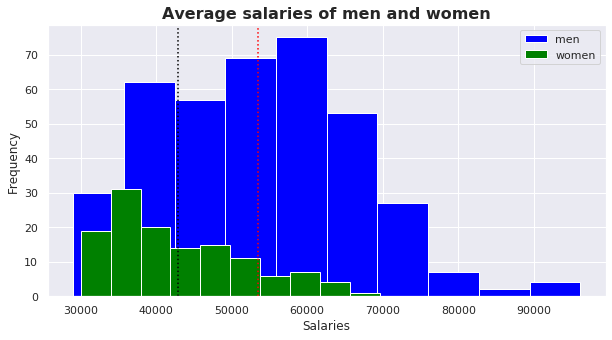

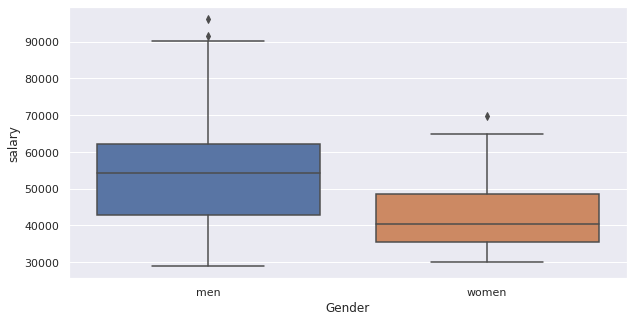

In [14]:
plt.figure(figsize=(10,5))
men = sal_data[sal_data.Gender == 'men'].salary
women = sal_data[sal_data.Gender == 'women'].salary

plt.hist(men, label='men', color="blue")
plt.hist(women, label='women', color="green")
plt.xlabel("Salaries")
plt.ylabel('Frequency')
plt.title('Average salaries of men and women', weight= 'bold', fontsize= 16)

plt.axvline(men.mean(), color='red', linestyle=':')
plt.axvline(women.mean(), color='black', linestyle=':')
plt.legend()


f, axes= plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(x='Gender', y='salary', data=sal_data, palette="deep")
plt.subplots_adjust(wspace=0.7, hspace=0.3)

plt.show()

- The graph tells us that more men are working than women and most of these men are earning more than females.
- It is safe to say that we have a positive skew because in our graph we see that most men are earning an average
of R60 000 meaning that our mean is greater than our mode.
- Also looking at our box plot we see that we have a positive skew for men and negative skew for females. We see
that by the streched out data from the bottom up in men that it is positive and this is where you tend to see most
outliers.

### Relationship between Years Worked and Salary

Text(0.5, 1.0, ' Relationship between Years Worked and Salary')

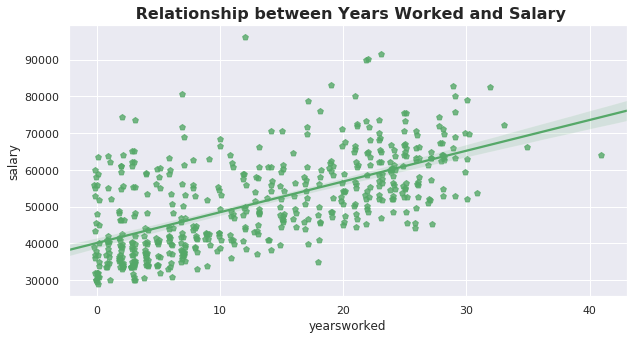

In [15]:
plt.figure(figsize=(10,5))
sns.regplot(x='yearsworked', y='salary', marker='p', x_jitter=.2, color ='g', data= sal_data)
plt.title(" Relationship between Years Worked and Salary", weight="bold", fontsize= 16)

- The are lot of points close to our trend line and there is a positive linear relationship between the salary and 
years worked.
- This means that as the years worked increased the more they salaries became more.
- With our observation of the scatter plot we see that we clearly have a few outliers of people who worked less but
got higher salaries.

### Nature of the relationship between Years Worked and Salary.

In [16]:
corr, p = pearsonr(sal_data.yearsworked, sal_data.salary)
print("corr is: ", corr, "with p_value of: ", p)        

corr is:  0.6231354820920547 with p_value of:  1.274779518969558e-56


- A correlation of 0.623 indicates a positive relationship between years worked and salary being earned.
    This means that they move together. 
    
- The small p-value of 1.274779518969558e-56 indicates that there is strong evidence to conclude that an increase in salary earned is due to an increase in years worked